# Prediction of articles shared using multiple linear regression

Data source: Fernandes, Vinagre, Cortez 
Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories. There are two main types: Simple regression and Multivariable regression.


In [1]:
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

In [2]:
#Data cleaning an readinf the csv file. I am dropping the empy rows and columns to be able to get a proper dataset which can be easily manipulated
df = pd.read_csv('data Mashable.csv')
df = df.dropna() 
df.info
df.head

<bound method NDFrame.head of           id                                                url  \
0          1  http://mashable.com/2013/10/29/ashton-kutcher-...   
1          2  http://mashable.com/2014/09/08/mashies-sept-19...   
2          3  http://mashable.com/2013/02/01/hello-kitty-roc...   
3          4  http://mashable.com/2014/02/06/add-us-on-snapc...   
4          5  http://mashable.com/2014/01/07/lindsey-vonn-wi...   
...      ...                                                ...   
24994  24995   http://mashable.com/2013/09/25/parkinsons-spoon/   
24995  24996  http://mashable.com/2013/05/20/esquire-weekly-...   
24996  24997  http://mashable.com/2014/07/13/google-world-cu...   
24997  24998  http://mashable.com/2013/01/17/thinkpad-chrome...   
24998  24999  http://mashable.com/2014/07/21/national-junk-f...   

       n_tokens_title  n_tokens_content  num_imgs  num_videos  \
0                  10               821        12           0   
1                   9              

In [3]:
df.shape

(24999, 27)

In [4]:
#df.describe()

In [5]:
#df.values

In [6]:
df = df.sort_values(by='shares', ascending=False) #sort the data set to see the most shared articles
df.head(10)

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
15508,15509,http://mashable.com/2013/07/03/low-cost-iphone/,12,688,15,1,4.893895,0,0,0,...,0,0,0,0,0.503345,0.186037,0.100000,-0.300000,843300,5.925982
16736,16737,http://mashable.com/2013/04/15/dove-ad-beauty-...,11,893,0,11,4.586786,0,0,1,...,0,0,0,0,0.450678,0.100533,0.000000,0.000000,690400,5.839101
22572,22573,http://mashable.com/2014/04/09/first-100-gilt-...,13,2591,1,1,4.588962,0,0,0,...,0,0,0,0,0.415273,0.075724,0.535714,0.285714,663600,5.821906
2022,2023,http://mashable.com/2013/11/18/kanye-west-harv...,9,134,0,2,4.082090,0,0,1,...,0,0,0,0,0.556854,0.004040,0.000000,0.000000,652900,5.814847
8128,8129,http://mashable.com/2013/03/02/wealth-inequality/,11,382,11,1,4.777487,0,0,0,...,0,1,0,1,0.340229,0.125005,0.000000,0.000000,617900,5.790918
11257,11258,http://mashable.com/2014/01/14/australia-heatw...,9,192,0,2,4.765625,0,0,1,...,0,0,0,0,0.506254,0.138755,0.454545,0.136364,310800,5.492481
7300,7301,http://mashable.com/2013/03/28/blackberry-1-mi...,10,905,21,0,4.492818,0,0,1,...,0,0,0,0,0.370382,0.121126,0.000000,0.000000,306100,5.485863
19359,19360,http://mashable.com/2013/11/14/ibm-watson-brief/,12,198,14,1,4.954545,0,0,1,...,0,0,0,0,0.577273,-0.063636,0.700000,-0.450000,298400,5.474799
4659,4660,http://mashable.com/2013/10/18/childhood-mashups/,10,390,0,16,5.133333,0,0,0,...,1,0,0,0,0.568687,0.262921,0.000000,0.000000,233400,5.368101
15178,15179,http://mashable.com/2013/02/28/myspace-tom-twi...,11,506,1,0,4.764822,0,0,0,...,0,0,0,0,0.525233,0.145535,0.600000,-0.400000,227300,5.356599


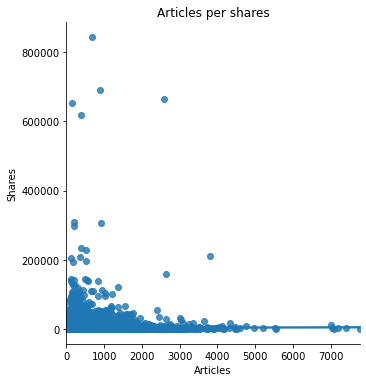

In [7]:
sns.lmplot(x='n_tokens_content', y='shares', data=df)
plt.title('Articles per shares')
plt.xlabel("Articles")
plt.ylabel("Shares")
plt.show()

In [13]:
working_list = ["n_tokens_content","num_imgs", "global_sentiment_polarity","num_videos", "title_sentiment_polarity"]
shares = ["shares_log"]
df2 = df.loc[:,working_list+shares]
#Splitting the dataset into a training and test set
training = df.loc[0:2,working_list+shares]
training

,n_tokens_content,num_imgs,global_sentiment_polarity,num_videos,title_sentiment_polarity,shares_log
0,821,12,0.082486,0,0.375,3.322219
7972,278,2,0.121235,1,0.000,3.322219
5521,197,1,0.278889,1,1.000,3.322219
3912,1518,23,0.145478,0,0.000,3.322219
3931,1104,35,0.030979,3,0.250,3.322219
...,...,...,...,...,...,...
22764,264,0,0.163796,0,0.300,3.176091
8616,2267,32,0.185747,0,0.500,3.176091
4468,773,60,-0.310324,1,-0.400,3.176091
14822,853,1,0.108559,4,0.000,3.176091


In [17]:

test = df.loc[20000,working_list + shares]
test.index = np.arange(len(test)) # to start the index number from 0 instead of 20000
test

0          429
1            1
2    0.0944186
3            0
4       -0.025
5      2.89708
Name: 20000, dtype: object

In [19]:
#from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = training[working_list] #dependent variable as I select
y = training["shares_log"] #independent variable
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b2 = lm.coef_[1] 
b3 = lm.coef_[2] 
b4 = lm.coef_[3] 
b5 = lm.coef_[4] 

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X1 + {b2:.2f}X2  + {b3:.2f}X3  + {b4:.2f}X4  + {b5:.2f}X5 ") #.0f formats to 2 decimals.

The regression line is equal to y = 3.25 + -0.00X1 + -0.00X2  + 0.00X3  + -0.00X4  + 0.00X5 


In [20]:
resultList = []
for i in range(len(test)): #{b1:.2f}X1 = b1*test.loc[i,"num_imgs"]
    prediction = b0 + b1*test.loc[i,working_list[0]] + b2*test.loc[i,working_list[1]] + b3*test.loc[i,working_list[2]] + b4*test.loc[i,working_list[3]] + b5*test.loc[i,working_list[4]]
    resultList.append(prediction)
    
    #i = 0 -> prediction = b0 + b1*1 + b2*0.4459 + b3*0.094419 + b4*0.350000 + b5*-0.025000
    #i = 0 -> Correct Value = 2.897077
    #i = 0 -> prediction = 3.235606

IndexingError: Too many indexers

In [21]:
results = test.copy()  #test.copy() = test = df.loc[20000:25000,feature_list + shares]
results["shares_log_p"] = pd.DataFrame(resultList) #predictions are added as a new column to the dataframe
results.head() 


0          429
1            1
2    0.0944186
3            0
4       -0.025
Name: 20000, dtype: object

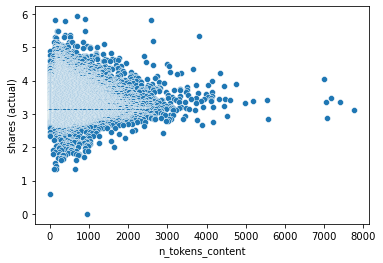

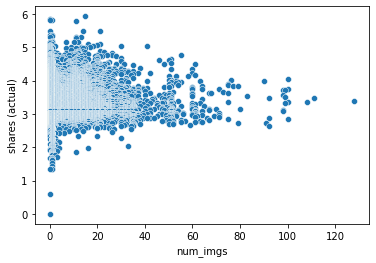

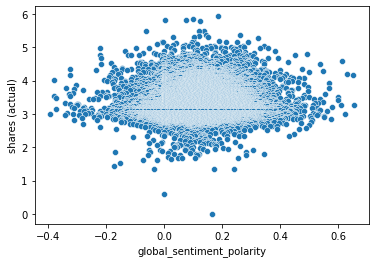

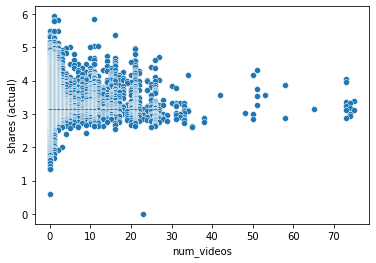

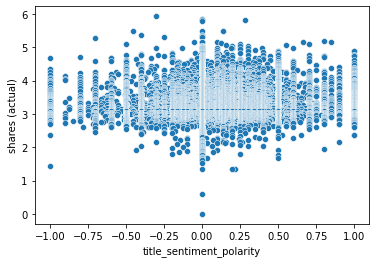

In [23]:
for feature in working_list:
    sns.scatterplot(x=feature,y='shares_log',data=df)
    plt.xlabel(feature)
    plt.ylabel('shares (actual)')
    plt.show()


In [25]:
r2_score(results['shares_log'], results['shares_log_p']) #this gives the model fit (R2) for the Y and predicted Y


KeyError: 'share_log'